## Determine Groups
This notebook is aimed at creating groups from our data in a data-drive way. Several methods will be experimented with till we find one that fits our data best.

In [9]:
# load the data in and check min, max, and counts
from pandas import DataFrame, Series, read_csv

#project_home = '/home/camachocm2/Analysis/EmoGrow/temperament/'
project_home = '/home/camachocm2/Analysis/aggregate_anats/'
data_dir = project_home + 'cleaned_data/'
results_dir = project_home + 'results/'

### Preprocess the temperament data
This cell standardizes the CBQ scales (i.e. convert to standard units)

In [10]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

data_file = data_dir + 'subject_data_20180710.csv'
data = read_csv(data_file)
cbq_data= data.iloc[:,1:14]

std = StandardScaler()
std.fit(cbq_data)
std_cbq = std.fit_transform(cbq_data)
labels = []
for a in cbq_data.columns:
    labels.append(a + '_std')
std_cbq_data = DataFrame(data=std_cbq,columns=labels)
std_cbq_data.describe()

,activity_level_std,anger_frustration_std,attention_focusing_std,discomfort_std,soothability_std,fear_std,high_intensity_pleasure_std,impulsivity_std,inhibitory_control_std,low_intensity_pleasure_std,perceptual_sensitivity_std,sadness_std,shyness_std
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-5.773160e-16,-2.331468e-16,-1.480297e-16,-2.886580e-16,-5.181041e-17,-8.881784e-17,5.884182e-16,-4.181840e-16,7.142435e-16,8.141636e-17,-1.628327e-16,-3.774758e-16,-7.401487e-18
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-2.473042e+00,-1.995735e+00,-2.994209e+00,-2.417147e+00,-2.701041e+00,-2.071607e+00,-2.395726e+00,-2.436692e+00,-2.530993e+00,-2.763401e+00,-3.126648e+00,-2.681392e+00,-2.207349e+00
25%,-6.838450e-01,-7.241274e-01,-5.721698e-01,-7.607414e-01,-7.016629e-01,-8.226997e-01,-5.989644e-01,-6.726940e-01,-7.492136e-01,-6.656687e-01,-6.232561e-01,-6.901862e-01,-7.508593e-01
50%,5.288332e-02,-1.942910e-01,7.755073e-03,-1.584121e-01,1.552137e-01,-7.335526e-02,9.209763e-02,3.290538e-02,-6.805438e-03,2.637065e-01,2.178971e-01,2.095875e-02,1.195441e-01
75%,8.948586e-01,9.713491e-01,8.264725e-01,7.450819e-01,7.621679e-01,6.759891e-01,7.831597e-01,7.018679e-01,6.242415e-01,7.416709e-01,7.195789e-01,7.321037e-01,7.012674e-01
max,2.017492e+00,1.819087e+00,1.918096e+00,2.702652e+00,2.154592e+00,2.549350e+00,1.888859e+00,2.502503e+00,2.071937e+00,1.485171e+00,1.890170e+00,2.438852e+00,2.446437e+00


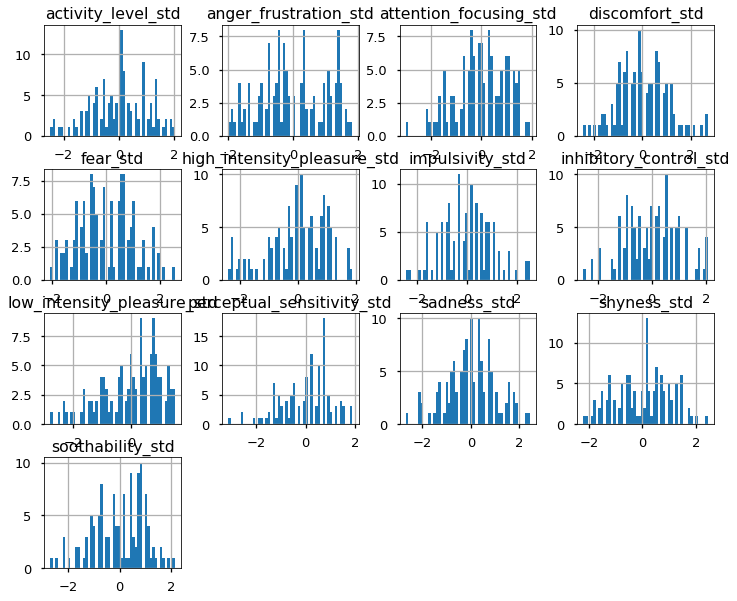

In [11]:
import matplotlib.pyplot as plt

std_cbq_data.hist(bins=50, figsize=(12,10))
plt.show()

In [73]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.analyze(std_cbq_data,3,rotation='varimax', method='ml', normalize=False)

print(fa.get_factor_variance())
factor_scores = fa.get_scores(std_cbq_data)
loads = fa.loadings
loads

                 Factor1   Factor2   Factor3
SS Loadings     3.064238  2.049644  1.464600
Proportion Var  0.235711  0.157665  0.112662
Cumulative Var  0.235711  0.393375  0.506037


,Factor1,Factor2,Factor3
activity_level_std,0.335652,0.681410,-0.010465
anger_frustration_std,0.906735,0.137424,0.082966
attention_focusing_std,-0.511257,-0.367541,0.191474
discomfort_std,0.476851,0.089227,0.359125
soothability_std,-0.800426,-0.131508,0.172092
fear_std,0.185064,0.036406,0.326928
high_intensity_pleasure_std,0.320502,0.458316,0.215907
impulsivity_std,0.279833,0.775035,0.072164
inhibitory_control_std,-0.592705,-0.468457,0.252472
low_intensity_pleasure_std,-0.069963,0.064865,0.717012


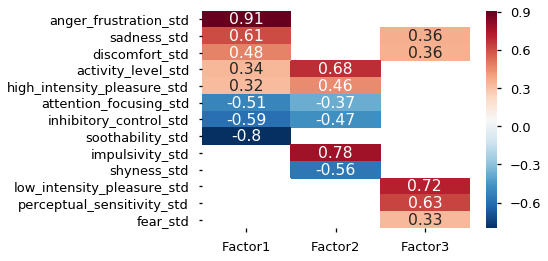

In [86]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
mask_upper = fa.loadings
mask_upper = mask_upper[mask_upper>.3]
mask_lower = fa.loadings
mask_lower = mask_lower[mask_lower<-0.3]
mask = mask_upper.radd(mask_lower, fill_value=0)
mask = mask.sort_values(by=['Factor1','Factor2','Factor3'], ascending=False)
sns.heatmap(mask, annot=True, cmap='RdBu_r')
plt.savefig(results_dir + 'loadings.png')

silhouette average for 3 clusters:0.25047443657019874
[-0.37605629  0.7130695  -0.4607466 ] [-0.78455047  0.565847    0.26783037]
Group sizes for 3 clusters:[43 44 33]


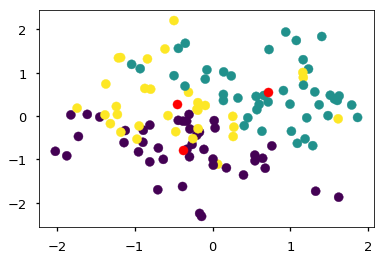

In [75]:
# Use K-means to cluster the data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import unique

#for n in [2,3,4]:
for n in [3]:
    kmeans = KMeans(n_clusters=n, random_state=0, max_iter=500).fit(factor_scores)
    silhouette_avg = silhouette_score(factor_scores, kmeans.fit_predict(factor_scores))
    print('silhouette average for '+ str(n) + ' clusters:' + str(silhouette_avg))
    
    cluster_centers = kmeans.cluster_centers_
    print(cluster_centers[:,0],cluster_centers[:,1])
    
    groups = kmeans.labels_
    group_names, group_ns = unique(groups, return_counts=True)
    print('Group sizes for '+ str(n) + ' clusters:' + str(group_ns))
    
    plt.figure()
    plt.scatter(factor_scores['Factor1'],factor_scores['Factor2'], c=kmeans.labels_)
    plt.scatter(cluster_centers[:,0],cluster_centers[:,1], c='red')
    plt.savefig(results_dir + str(n) + 'component_scatter.png')
    plt.show()

In [76]:
std_cbq_data['kmgroup'] = Series(groups, index=None, name='kmgroup')
all_data = data.join(std_cbq_data)
all_data.to_csv(results_dir + str(n) + 'kmeans_group_data.csv')

std_cbq_data_m = std_cbq_data.groupby('kmgroup').mean()
std_cbq_data_m.to_csv(results_dir + str(n) + 'kmeans_group_summary_data.csv')

# Characterizing the groups

In [77]:
from pandas import read_csv
from scipy.stats import ttest_ind

print('######  2 GROUPS  #####')
cbq_data = read_csv(results_dir + '2kmeans_group_data.csv', index_col=0)
kmg0 = cbq_data[cbq_data['kmgroup']==0]
kmg1 = cbq_data[cbq_data['kmgroup']==1]

scales = ['activity_level','anger_frustration', 'attention_focusing',
          'discomfort', 'soothability', 'fear', 'high_intensity_pleasure',
          'impulsivity', 'inhibitory_control', 'low_intensity_pleasure',
          'perceptual_sensitivity', 'sadness', 'shyness']
for scale in scales:
    t,p=ttest_ind(kmg0[scale],kmg1[scale], equal_var=False)
    print('%s: the tvalue is %f and the pvalue is %f' % (scale,t,p))

######  2 GROUPS  #####
activity_level: the tvalue is 7.485585 and the pvalue is 0.000000
anger_frustration: the tvalue is 11.183744 and the pvalue is 0.000000
attention_focusing: the tvalue is -8.157717 and the pvalue is 0.000000
discomfort: the tvalue is 6.500933 and the pvalue is 0.000000
soothability: the tvalue is -7.996172 and the pvalue is 0.000000
fear: the tvalue is 2.266057 and the pvalue is 0.025315
high_intensity_pleasure: the tvalue is 5.692401 and the pvalue is 0.000000
impulsivity: the tvalue is 5.365398 and the pvalue is 0.000000
inhibitory_control: the tvalue is -7.230606 and the pvalue is 0.000000
low_intensity_pleasure: the tvalue is -0.724185 and the pvalue is 0.470400
perceptual_sensitivity: the tvalue is 0.105816 and the pvalue is 0.915909
sadness: the tvalue is 6.008308 and the pvalue is 0.000000
shyness: the tvalue is -0.445847 and the pvalue is 0.656531


<Figure size 2880x720 with 0 Axes>

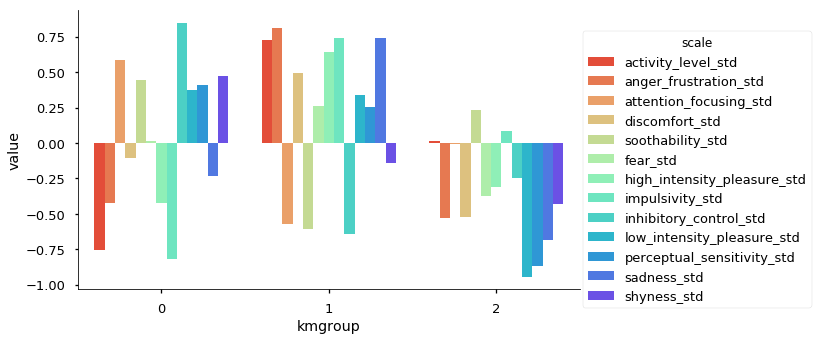

In [78]:
# Visualize the new groups
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import melt

sns.set_context('talk')

long_std_cbq = melt(std_cbq_data, id_vars=['kmgroup'],
                    value_vars=['activity_level_std', 'anger_frustration_std',
                                'attention_focusing_std', 'discomfort_std', 'soothability_std',
                                'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
                                'inhibitory_control_std', 'low_intensity_pleasure_std',
                                'perceptual_sensitivity_std', 'sadness_std', 'shyness_std'], 
                    var_name='scale',
                    value_name='value')
#long_std_cbq
plt.figure(figsize=(40,10))

sns.factorplot(x='kmgroup', y='value',hue='scale',data=long_std_cbq, 
               kind='bar',size=5,palette='rainbow_r',legend=True, aspect=1.75, ci=None)
plt.savefig(results_dir + str(n) + 'groups_plots.png',transparent=False)

In [79]:
from pandas import merge, read_csv

raw_data = read_csv(data_dir + 'aseg_data_20180807-154514.csv', index_col=0)
usability_key = read_csv(data_dir + 'usability_20180710.csv', index_col=None)
cbq_data = read_csv(results_dir + '3kmeans_group_data.csv', index_col=0)
subject_info = read_csv(data_dir + 'subject_info_20180710.csv', index_col=None)

clean_data=DataFrame()
clean_data['freesurferID']=raw_data['freesurferID']
clean_data['eTIV']=raw_data['eTIV']

for region in ['Putamen','Pallidum','Caudate','Accumbens-area','Amygdala','Hippocampus']:
    clean_data['Left-'+region] = raw_data['Left-'+region][usability_key['Left-'+region]==1]
    clean_data['Right-'+region] = raw_data['Right-'+region][usability_key['Right-'+region]==1]

merged_data = clean_data.merge(cbq_data, on='freesurferID')
merged_data = merged_data.merge(subject_info, on='freesurferID')
merged_data = merged_data.join(factor_scores)

for region in ['Putamen','Pallidum','Caudate','Accumbens-area','Amygdala','Hippocampus']:
    merged_data['tot'+region] = merged_data['Left-'+region] + merged_data['Right-'+region] #raw units
    merged_data['tot'+region+'_std'] = (merged_data['tot'+region] - merged_data['tot'+region].mean())/merged_data['tot'+region].std(ddof=0) #standard units

for measure in ['internalizing','externalizing']:
    merged_data[measure+'_std'] = (merged_data[measure] - merged_data[measure].mean())/merged_data[measure].std(ddof=0) #standard units

merged_data.to_csv(results_dir + 'combined_data_k3_20180807.csv')
merged_data.describe()

,eTIV,Left-Putamen,Right-Putamen,Left-Pallidum,Right-Pallidum,Left-Caudate,Right-Caudate,Left-Accumbens-area,Right-Accumbens-area,Left-Amygdala,...,totCaudate,totCaudate_std,totAccumbens-area,totAccumbens-area_std,totAmygdala,totAmygdala_std,totHippocampus,totHippocampus_std,internalizing_std,externalizing_std
count,1.200000e+02,115.000000,114.000000,116.000000,118.000000,115.000000,117.000000,120.000000,120.000000,104.000000,...,114.000000,1.140000e+02,120.000000,1.200000e+02,102.000000,1.020000e+02,98.000000,9.800000e+01,1.200000e+02,1.200000e+02
mean,1.489225e+06,5426.363478,5438.808772,2021.901724,1935.690678,3866.980000,3999.535043,600.444167,629.180000,1553.011538,...,7877.255263,-7.323576e-16,1229.624167,-1.339669e-15,3209.735294,5.616422e-16,7942.255102,-1.404772e-16,-1.480297e-17,-1.850372e-17
std,1.490943e+05,684.862107,613.622761,248.942595,251.074280,517.192608,547.059492,114.187852,107.115859,215.933273,...,1032.550084,1.004415e+00,209.553507,1.004193e+00,401.931806,1.004938e+00,857.542541,1.005141e+00,1.004193e+00,1.004193e+00
min,1.142335e+06,3556.100000,4038.400000,1585.200000,1396.600000,2531.100000,2726.100000,378.700000,411.300000,994.700000,...,5390.400000,-2.419093e+00,850.200000,-1.818223e+00,2260.700000,-2.372845e+00,6077.200000,-2.186065e+00,-7.038818e-01,-8.283993e-01
25%,1.384448e+06,4959.600000,4965.100000,1818.675000,1752.375000,3597.650000,3671.600000,528.025000,559.800000,1379.625000,...,7244.550000,-6.154652e-01,1089.125000,-6.732804e-01,2920.275000,-7.237291e-01,7426.725000,-6.042623e-01,-6.451842e-01,-7.722049e-01
50%,1.488541e+06,5461.300000,5410.250000,2001.550000,1909.500000,3861.900000,4010.600000,578.850000,616.500000,1536.850000,...,7866.200000,-1.075403e-02,1201.900000,-1.328559e-01,3216.550000,1.703861e-02,7902.200000,-4.694932e-02,-4.690915e-01,-4.912328e-01
75%,1.584077e+06,5787.000000,5875.525000,2206.275000,2141.175000,4080.700000,4294.600000,669.225000,686.225000,1680.875000,...,8342.275000,4.523488e-01,1359.100000,6.204559e-01,3412.250000,5.063416e-01,8412.000000,5.505967e-01,2.352795e-01,5.905096e-01
max,1.975068e+06,7658.500000,7436.300000,2712.700000,2570.800000,5572.700000,5889.900000,1115.900000,1127.400000,2117.800000,...,11462.600000,3.487651e+00,2243.300000,4.857595e+00,4179.900000,2.425674e+00,10590.500000,3.104057e+00,3.639739e+00,2.992821e+00


In [80]:
merged_data.columns

Index(['freesurferID', 'eTIV', 'Left-Putamen', 'Right-Putamen',
       'Left-Pallidum', 'Right-Pallidum', 'Left-Caudate', 'Right-Caudate',
       'Left-Accumbens-area', 'Right-Accumbens-area', 'Left-Amygdala',
       'Right-Amygdala', 'Left-Hippocampus', 'Right-Hippocampus',
       'activity_level', 'anger_frustration', 'attention_focusing',
       'discomfort', 'soothability', 'fear', 'high_intensity_pleasure',
       'impulsivity', 'inhibitory_control', 'low_intensity_pleasure',
       'perceptual_sensitivity', 'sadness', 'shyness', 'activity_level_std',
       'anger_frustration_std', 'attention_focusing_std', 'discomfort_std',
       'soothability_std', 'fear_std', 'high_intensity_pleasure_std',
       'impulsivity_std', 'inhibitory_control_std',
       'low_intensity_pleasure_std', 'perceptual_sensitivity_std',
       'sadness_std', 'shyness_std', 'kmgroup', 'SubjectID', 'Study',
       'Sequence Version', 'in_analysis', 'Same Kid as:', 'Dx_Group',
       'Age_yrs', 'Age_mos', 'ma

/usr/local/lib/python3.5/dist-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<Figure size 432x432 with 0 Axes>

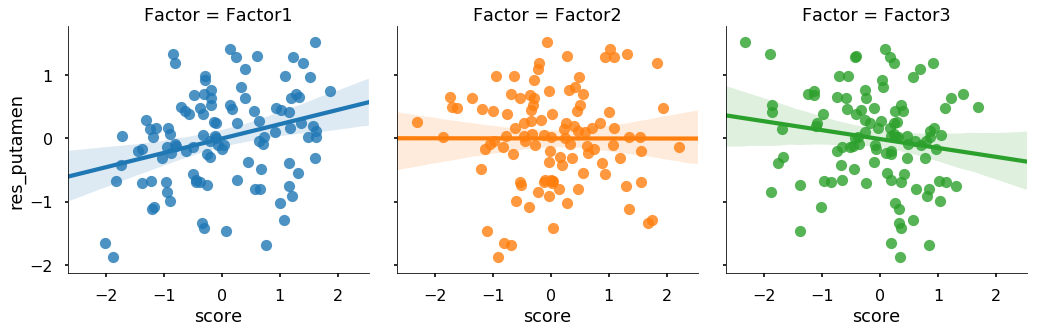

In [110]:
import matplotlib
from pandas import read_csv,DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt

results_dir = '/home/camachocm2/Analysis/aggregate_anats/results/'

data = read_csv(results_dir + 'residual_complete_data.csv', index_col=0)
data_long = melt(data, id_vars=['freesurferID', 'eTIV', 'Left-Putamen', 'Right-Putamen',
                                'Left-Pallidum', 'Right-Pallidum', 'Left-Caudate', 'Right-Caudate',
                                'Left-Accumbens-area', 'Right-Accumbens-area', 'Left-Amygdala',
                                'Right-Amygdala', 'Left-Hippocampus', 'Right-Hippocampus',
                                'activity_level', 'anger_frustration', 'attention_focusing',
                                'discomfort', 'soothability', 'fear', 'high_intensity_pleasure',
                                'impulsivity', 'inhibitory_control', 'low_intensity_pleasure',
                                'perceptual_sensitivity', 'sadness', 'shyness', 'activity_level_std',
                                'anger_frustration_std', 'attention_focusing_std', 'discomfort_std',
                                'soothability_std', 'fear_std', 'high_intensity_pleasure_std',
                                'impulsivity_std', 'inhibitory_control_std','low_intensity_pleasure_std', 
                                'perceptual_sensitivity_std','sadness_std', 'shyness_std', 'kmgroup', 
                                'SubjectID', 'Study','Sequence Version', 'in_analysis', 'Same Kid as:', 
                                'Dx_Group','Age_yrs', 'Age_mos', 'male', 'clinical', 'smd', 'adhd', 'meds',
                                'internalizing', 'externalizing','totPutamen', 'totPutamen_std', 
                                'totPallidum', 'totPallidum_std','totCaudate', 'totCaudate_std', 
                                'totAccumbens-area','totAccumbens-area_std', 'totAmygdala', 
                                'totAmygdala_std','totHippocampus', 'totHippocampus_std', 
                                'internalizing_std','externalizing_std','res_pall','res_putamen'], 
                 value_vars=['Factor1', 'Factor2', 'Factor3'], var_name='Factor',value_name='score')

sns.set_context('poster')
# Visualize results

plt.figure(figsize=(6,6))
sns.lmplot(x='score',y='res_putamen',data=data_long,col='Factor',hue='Factor',ci=95)
#plt.savefig(results_dir + 'putamen_factors.svg',transparent=True)
plt.show()

In [120]:
from pandas import concat, merge
factors = merge([data['Factor2'],data['Factor3']],)
factors.head()

TypeError: merge() missing 1 required positional argument: 'right'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')

fig, ax = plt.subplots(figsize=(8,6))
sns.set(style='whitegrid',  palette='pastel', color_codes=True)
sns.violinplot(x='Sequence Version', y='Age_yrs', hue='male', data=data, split=True,inner='quart')
sns.despine(left=True)
ax.legend_.remove()
plt.savefig(project_home + 'age_sex_sample.png')

seq1 = data[data['Sequence Version']=='20chTrio']
seq2 = data[data['Sequence Version']=='20chTrio2']
seq3 = data[data['Sequence Version']=='64chMMR']

plt.figure()
plt.hist([seq1['Age_yrs'],seq2['Age_yrs'],seq3['Age_yrs']], bins=9, stacked=True, edgecolor='black', label=['20chTrio','20chTrio2','64chMMR'])
plt.legend()
plt.show()